# Initial data analysis and Linear Regression

This assignment is dedicated to Linear regression. By focusing on prediction different features of football players you understand the mathematics behind it and see the usefulness of main data analysis libraries.

**Materials**
- [Documentation](http://docs.scipy.org/doc/) libraries Numpy and SciPy
- [Documentation](http://matplotlib.org/) library Matplotlib 
- [Documentation](http://pandas.pydata.org/pandas-docs/stable/tutorials.html) library Pandas
- [Pandas Cheat Sheet](http://www.analyticsvidhya.com/blog/2015/07/11-steps-perform-data-analysis-pandas-python/)
- [Documentation](http://stanford.edu/~mwaskom/software/seaborn/) library Seaborn 

**Resources**
- In this notebook we will use *FIFA 19 complete player dataset* which is taken from [here](https://www.kaggle.com/karangadiya/fifa19)

## Part 1. Initial data analysis with Pandas

Importing libraries.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

%matplotlib inline

Load the data. Table *data.csv* should be in the same directory as this notebook.

In [2]:
data = pd.read_csv("data.csv", index_col='ID')

The first thing you need to do with a dataframe after loading is to look at first few records. This way you can make sure that you have parsed it correctly. Moreover, you can get acquainted with the data, look at the features and their type (categorical, numerical, text ...).

They you may check whether the data has missing values inside. Depending on the problem type and percentage of missing values you can either fill them with some value or drop columns/rows having null values.

After that you may want to look closer at some features. You can draw a histogram for defining a feature distribution (normal, power or some other). Also with the help of histogram you can find values which are really differ from the rest, we call them **outliers**. Histograms can be plotted by *hist* method of Pandas DataFrame.

**Example 1** Let's look at first 5 rows of data using method *head* for DataFrame data.

In [3]:
data.head()

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
ID,,,,,,,,,,,,,,,,,,,,,
158023,0,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
20801,1,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
190871,2,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
193080,3,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
192985,4,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


Unfortunately the number of columns exceeds the maximum visible default value in Pandas. Use the magic line above to remove this restriction.

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
data.head()

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,0,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
20801,1,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
190871,2,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
193080,3,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
192985,4,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


Much better now.

**Example 2** Print total player number and top-10 columns containing the most number of null values.

In [6]:
print(f"Total number of players in dataset {data.shape[0]}")

Total number of players in dataset 18207


In [7]:
from tabulate import tabulate

top = 10
print(tabulate(
    sorted(list(zip(data.columns, data.isnull().sum(), data.isnull().sum() / data.shape[0] * 100)), key=lambda x: -x[2])[:top], 
    headers=['col_name', 'null_cnt', 'null_perc']))

col_name       null_cnt    null_perc
-----------  ----------  -----------
Loaned From       16943      93.0576
LS                 2085      11.4516
ST                 2085      11.4516
RS                 2085      11.4516
LW                 2085      11.4516
LF                 2085      11.4516
CF                 2085      11.4516
RF                 2085      11.4516
RW                 2085      11.4516
LAM                2085      11.4516


**Example 3**. Let's built a histogram of weight distribution in kgs from footbal players data. Follow steps:
- Extract weight value from string (column Weight).
- Convert *Weight* column to float type.
- Get rid of null values in weight column, use median column value instead of them.
- Convert pounds to kilograms
- Finally use method *hist* for DataFrame *data* with arguments *column=Weight* (we look at this feature distribution)

In [8]:
print(f"Weight column type is '{data['Weight'].dtype}'")

Weight column type is 'object'


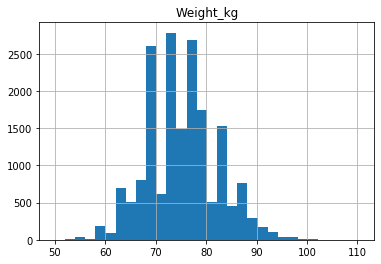

In [9]:
data['Weight_float'] = data['Weight'].str.extract(r'([0-9]+)lbs').astype(float)
data['Weight_float'].fillna(data['Weight_float'].median())
POUND_TO_KILO = 0.454
data['Weight_kg'] = data.apply(lambda row: row['Weight_float'] * POUND_TO_KILO, axis=1)
data.hist(column='Weight_kg', bins=30)
plt.show()

**Task 1 (1 point)**. Built a histogram of the height distribution in *meters* from footbal player data. Remember that height is in format *feet* '*inches*.  Instead of filling null values with some constant just drop them. Use *.dropna* for specified column.

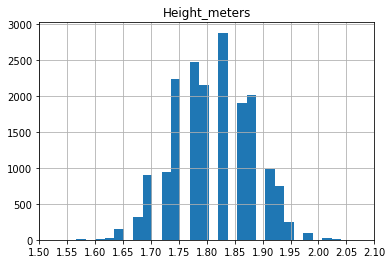

In [10]:
f_to_m = 0.3048
in_to_m = 0.0254
data['Height_meters'] = data['Height'].str.extract(r'([0-9]+)\'').astype(float) * f_to_m + \
data['Height'].str.extract(r'\'([0-9]+)').astype(float) * in_to_m

data['Height_meters'].dropna().hist(bins=30)
plt.title('Height_meters')
plt.xticks(np.arange(1.5, 2.1, 0.05));

Effective way to visualize the relationship between two features is to draw a simple _scatter plot_. The position of each dot on the horizontal and vertical axis indicates values for an individual data point.

**Example 4.** Visualize the dependence of _Strength_  on _Weight_kg_.

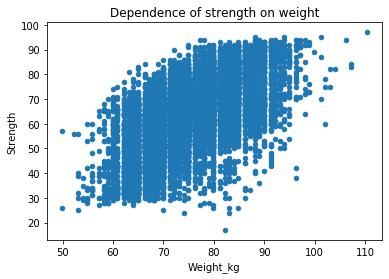

In [11]:
data.plot.scatter(x='Weight_kg', y='Strength')
plt.title('Dependence of strength on weight')
plt.show()

One more effective way of initial data analysis is to plot pairwise feature dependencies. That simply combines already considered Scatter plot and a histogram. We create $m \times m$ plots (_m_ is number of features) where pictures on diagonal represent **histograms** and outside the diagonal **scatter_matrix**. That can be done with the help of _scatter_matrix_ Pandas DataFrame method or _pairplot_ in Seaborn.

**Example 5.**
Illustrate pairwise dependencies between _ShortPassing_, _Dribbling_, _BallControl_ and _Strength_ features of footbal players.

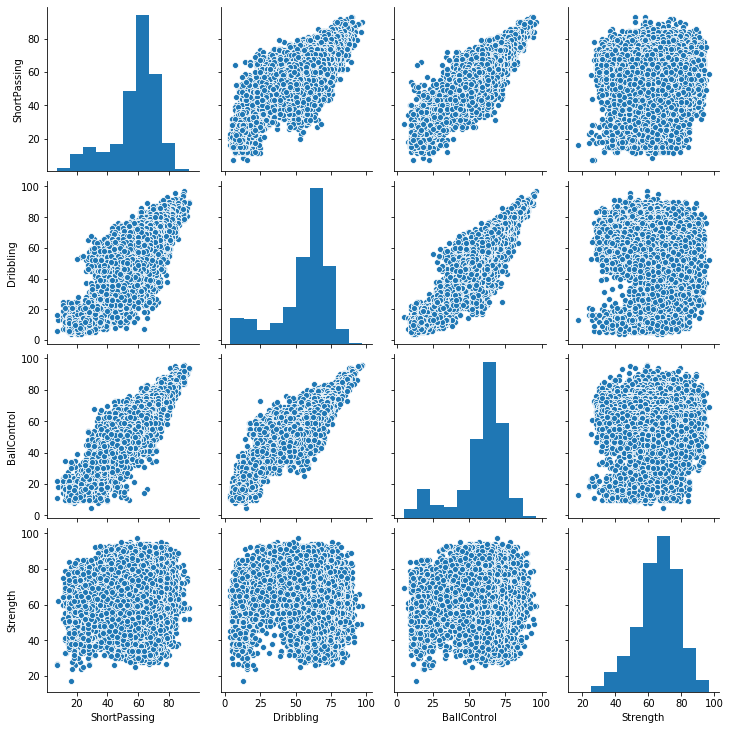

In [12]:
sns.pairplot(data[['ShortPassing', 'Dribbling', 'BallControl', 'Strength']])

Histograms and scatter plots are good for continuous (numerical) features. Distribution of data by categorical features (that have a fixed number of possible values) can be represented with **bar charts**.

**Example 6.** Show distribution of players by age groups (under 20 yo. _young_, between 20-30 _mature_, over 30 yo. _masters_)

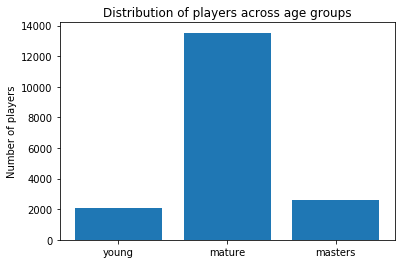

In [13]:
data['age_group'] = data.apply(lambda x: 'young' if x['Age'] < 20 else 'mature' if x['Age'] <= 30 else 'masters', axis=1)
distr = data.groupby('age_group').count().max(axis=1)[['young', 'mature', 'masters']]

plt.bar(distr.index, distr.values)
plt.ylabel('Number of players')
plt.title('Distribution of players across age groups')
plt.show()

Really often it is necessary to explore the distribution of some numerical feature based on the value of categorical one. Here comes the _boxplot_ of Seaborn library, which can show statistics of numerical features (mean, quantiles) by different value of categorical feature. Boxplot can also help to detect **outliers** - values that significantly differ from the rest. More detailed explanation [here](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51).

**Example 7.** Show _SprintSpeed_ statistics across different age groups.

_Hint_: in order to prevent printing the service information and make our pictures more attractive we can write `;` in the end of last line.

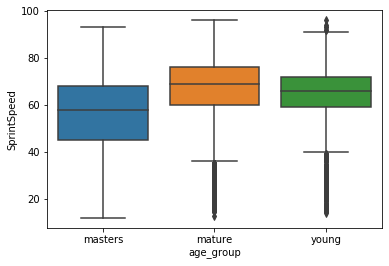

In [14]:
sns.boxplot(x='age_group', y='SprintSpeed', data=data);

## Part 2. Minimizing Mean Squared Error. Linear Regression

We are going to predict target numerical variable $y$ for _n_ samples with the help of $x_1, x_2, ..., x_m$ _m_ features under the assumption of _liner dependence_ existence between features and target, i.e.
$$\hat{y} = w_0 + w_1 * x_1 + w_2 * x_2 + ... + w_m * x_m$$
so that Mean Squared Error between $y$ and $\hat{y}$ was the lowest possible
$$MSE = \frac{1}{n}\sum_{i=1}^n {(y_i - \hat{y})}^2 -> min_{w_0, w_1, w_2, ...w_m}$$
where $w_0$ is "free" weight component called **intercept** and $(w_1, w_2, ... w_n)$ is a **vector of coefficients**.

 ### Part 2.1 Linear Regression with one variable

Just to understand the basic principles, let's try to predict _BallControl_ score based on the _Dribbling_ score for every player. Simple Linear Regression with one feature.
$$BallControl = w_0 + w_1 * Dribbling$$

We are going to do real data science, aren't we? So let us split the available data into train and test samples. We let our model see only the train data, then we can measure it's quality on test sample.

In [15]:
from sklearn.model_selection import train_test_split

data.fillna({'BallControl': data['BallControl'].mean(), 'Dribbling': data['Dribbling'].mean()}, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(data['Dribbling'].values, data['BallControl'].values, train_size=0.8)
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

To illustrate the approach, let's use Ridge model from sklearn with _regularization_ param alpha=0. What does it mean and what it if for we will find out later on in this course. But for now I require avoiding regularization by setting regularization param to zero.

In [16]:
from sklearn.linear_model import Ridge

lr = Ridge(alpha=0)
lr.fit(X=X_train, y=y_train)

Ridge(alpha=0, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [17]:
print(f'w_0 = {lr.intercept_}, w_1 = {lr.coef_[0]}')

w_0 = 12.491915859547284, w_1 = 0.8283088084324871


In [18]:
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

In [19]:
data['predicted_BallControl'] = lr.predict(data['Dribbling'].values.reshape(-1, 1))
data[['Name', 'Dribbling', 'BallControl', 'predicted_BallControl']].head()

,Name,Dribbling,BallControl,predicted_BallControl
ID,,,,
158023,L. Messi,97.0,96.0,92.837870
20801,Cristiano Ronaldo,88.0,94.0,85.383091
190871,Neymar Jr,96.0,95.0,92.009561
193080,De Gea,18.0,42.0,27.401474
192985,K. De Bruyne,86.0,91.0,83.726473


Right now we have predictions for train and test samples. How about measure the quality of the model?

**Task 2 (0.5 point).** Write your own function for MSE calculation using the formula above. Calculate train and test MSE, compare to built-in method (_sklearn.metrics.mean_squared_error_)

In [20]:
def mse(y_true, y_pred):
    error = np.square(y_true - y_pred).mean()
    return error

In [21]:
from sklearn.metrics import mean_squared_error

assert round(mean_squared_error(y_train, y_pred_train), 9) == round(mse(y_train, y_pred_train), 9)
assert round(mean_squared_error(y_test, y_pred_test), 9) == round(mse(y_test, y_pred_test), 9)

In [22]:
print(f'Train MSE {mse(y_train, y_pred_train)}, test MSE {mse(y_test, y_pred_test)}')

Train MSE 32.858080944504394, test MSE 32.94549935453854


**Task 3 (1.5 points).** Visualize the dependence of **test** _BallControl_ predictions and real _BallControl_ score on _Dribbling_ score. Don't forget to add axis and plot names!

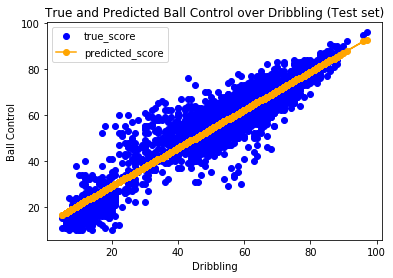

In [23]:
plt.figure()
plt.plot(X_test, y_test, 'ob', label='true_score')
plt.plot(X_test, y_pred_test, marker='o', color='orange', label='predicted_score')
plt.xlabel('Dribbling')
plt.ylabel('Ball Control')
plt.title('True and Predicted Ball Control over Dribbling (Test set)')
plt.legend();

### Part 2.2 Linear regression with many variables

**Task 4 (5 points).** Implement your own Linear Regression class for any number of input features and settable boolean parameter *fit_intercept*.

In this task you will work with _optimize_ module of [_scipy_](https://docs.scipy.org/doc/scipy/reference/) open-source library for mathematics, science, and engineering. You will need a function [_least_squares_](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.least_squares.html) that finds a coefficients for linear regression by minimizing the sum of the squares of the residuals (which is equivalent to MSE minimizing). More information about least squares approach [here](https://en.wikipedia.org/wiki/Least_squares). <br><br>
Even though this function has many parameters, you need only a few of them to complete the task (the rest will be filled in with default values automatically).
- **fun** computes a vector of residuals given weights, features and target, we provide you a function template _compute_residuals_
- **x0** this is an initial weights vector. You can either pass a vector of zeros[n_features] or fill in randomly.
- **args** are fixed arguments to _fun_ function (which we are not going to optimize). In that particular case you will need to pass X and y.


You can access optimized weights by accessing the field **.x** of object which returns by this function.

!!! IMPORTANT <br>
Please complete this assignment **without any cycles**. You may use the standard operations of matrix \ vector multiplication ans different statistic calculation with NumPy. Otherwise, your solution may not go through asserts.

In [24]:
def compute_residuals(w, X, y):
    """
    Compute residuals when predicting y_hat as matrix product of X and transposed w
    :param w: linear regression weights, numpy.ndarrya: float64[num_features]
    :param X: training features, numpy.ndarray: float64[num_samples, num_features]
    :param y: training target, numpy.ndarray: float64[num_samples]
    :returns: vector of residuals (y_i_hat - y_i) for each sample_i in X
    
    """
    residuals = y - X.dot(w)
    return residuals

In [25]:
from sklearn.base import BaseEstimator
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from scipy.optimize import least_squares

class LinearRegression(BaseEstimator):
    def __init__(self, fit_intercept=True):
        self.fit_intercept = fit_intercept
    
    def fit(self, X, y):
        """
        fit model weights given input features and target
        :param X: training features, numpy.ndarray: numeric[num_samples, num_features]
        :param y: training target, numpy.ndarray: numeric[num_samples]
        :returns: linear predictor with fitted weights so that train MSE is the lowest possible
        :note: weights: numpy.ndarray: float64[num_features] stored as class field

        """
        
        # Check that X and y have correct shape
        X, y = check_X_y(X, y)
        
        # Save train data information. Necessary for following the uniform API
        self.X_ = X
        self.y_ = y
        self.n_features_in_ = X.shape[1]
        
        # Copy arrays and cast them to uniform type
        X_train = X.astype('float64')
        y_train = y.astype('float64')
        
        # Add dummy column of ones to X_train if we want to train an intercept - last component of future weight vector
        if self.fit_intercept:
            X_train = np.column_stack((X_train, np.ones(X_train.shape[0])))
        
        # Your code here.
        # Just follow the suggested steps: create initial weights vector,
        # apply least_squares optimizer passing the parameters described above
        # and finally extract optimized weights.
        # Remember: you need to distinguish coefficients from intercept when fit_intercept=True
        self.coef_ = least_squares(fun=compute_residuals, x0=np.zeros(X_train.shape[1]), args=(X_train, y_train)).x
        self.intercept_ = 0
        
        if self.fit_intercept:
            self.intercept_ = self.coef_[-1]
            self.coef_ = self.coef_[:-1]
        
        # Return the classifier
        return self
        
    def predict(self, X):
        # Check is fit had been called
        check_is_fitted(self)
        
        # Input validation
        X = check_array(X)
        
        return X.dot(self.coef_) + self.intercept_

In [26]:
#Testing area
from sklearn.utils.estimator_checks import check_estimator
from sklearn.linear_model import Ridge

lr = LinearRegression()
ridge = Ridge(alpha=0)
lr_no_intercept = LinearRegression(fit_intercept=False)
ridge_no_intercept = Ridge(alpha=0, fit_intercept=False)

#Check compatibility with Sklearn framework and apply some spesific internal tests
check_estimator(lr)
check_estimator(lr_no_intercept)

#Compare model accuracy with Ridge(0) from Sklearn
data.fillna({'BallControl': data['BallControl'].mean()
             , 'Dribbling': data['Dribbling'].mean()
             , 'Strength': data['Strength'].mean()}, inplace=True)
X_sample, y_sample = data[['Dribbling', 'Strength']], data['BallControl']
lr.fit(X_sample, y_sample)
ridge.fit(X_sample, y_sample)
assert np.allclose(lr.predict(X_sample), ridge.predict(X_sample), rtol=1e-03), "Your model with intercept not accurate enough!"
lr_no_intercept.fit(X_sample, y_sample)
ridge_no_intercept.fit(X_sample, y_sample)
assert np.allclose(lr_no_intercept.predict(X_sample), ridge_no_intercept.predict(X_sample), rtol=1e-03), "Your model without intercept not accurate enough!"

Let's add more features in order to predict Dribbling score more accurately.

In [27]:
features = ['BallControl', 'ShortPassing', 'Strength', 'Weight_float', 'Weight_kg']
target = 'Dribbling'
for feat in features:
    data.fillna({feat: data[feat].mean()}, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(data[features].values, data[target].values, train_size=0.8, random_state=2)

In [28]:
lr = Ridge(0)
lr.fit(X=X_train, y=y_train)

y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

print(f'Train MSE {mean_squared_error(y_train, y_pred_train)}, test MSE {mean_squared_error(y_test, y_pred_test)}')

Train MSE 37.67559008505622, test MSE 33.955701857311375


In [29]:
print(f'w_0 = {lr.intercept_}, w_1, w_2, w_3, w_4, w_5 = {lr.coef_}')

w_0 = 11.85473062796337, w_1, w_2, w_3, w_4, w_5 = [ 1.0935819  -0.04753912 -0.12736495 -0.68291621  1.38179348]


That is not ok, two last weight components are too large, and they vary depending on the run! Although the result seems better our model would behave unexpectadly to the patterns in data it has never seen! Large weights and weights instability are the sign of [**overfitting**](https://en.wikipedia.org/wiki/Overfitting).  <br><br>
According to the definition it is "_the production of an analysis that corresponds too closely or exactly to a particular set of data, and may therefore fail to fit additional data or predict future observations reliably_". But what does it actually mean?

Assume that we have a player whose weight in kg was calculated with some tiny error, let's say +=1g.

In [30]:
player = data[features + [target]].iloc[0:2]
player['Predicted_dribbling'] = lr.predict(player[features].values)
player.head()

,BallControl,ShortPassing,Strength,Weight_float,Weight_kg,Dribbling,Predicted_dribbling
ID,,,,,,,
158023,96.0,90.0,59.0,159.0,72.186,97.0,96.208007
20801,94.0,81.0,79.0,183.0,83.082,88.0,90.567429


Predictions are pretty good if the data is _pure_. Let's add some noise to _Weight_kg_ feature:

In [31]:
player['Weight_kg'] = player['Weight_kg'] + [-0.001, 0.001]
player['Predicted_dribbling_with_error'] = lr.predict(player[features].values)
player.head()

,BallControl,ShortPassing,Strength,Weight_float,Weight_kg,Dribbling,Predicted_dribbling,Predicted_dribbling_with_error
ID,,,,,,,,
158023,96.0,90.0,59.0,159.0,72.185,97.0,96.208007,96.206626
20801,94.0,81.0,79.0,183.0,83.083,88.0,90.567429,90.568811


Predicted dribbling value has changed significantly! Look at how this tiny **1g** error leads to extremly big or small dribbling!

The reason behind it is strange unstable behaviour is **collinearity** between Weight and Weight_kg features, what means that Weight_kg can be linearly predicted from Weight. As a matter of fact they represent the same essense but in different scales. <br><br>
**Multicollinearity** describes a more general case, when one feature can be predicted by linear combination of some other features.<br><br>
Collinearity is really close related to **correlation** - degree to which a pair of variables are linearly related. Collinearity origins from Linear Algebra and Geometry whereas Correlation is a term from Statistics. Anyway all of this three terms refer to **linearly dependent features**, which is really bad for Linear Models.

But why it is so bad? The main reason is that Linear Regression tries to capture the contribution of each feature to target _independently_, which obviously is not possible in terms of feature multicolliearity.<br><br>
There are a whole bunch of really interesting thoughts that can help to capture the intuition behind it [here](https://stats.stackexchange.com/questions/1149/is-there-an-intuitive-explanation-why-multicollinearity-is-a-problem-in-linear-r). I'd citate one of the examples provided.<br><br>
_Assume that two people collaborated and accomplished scientific discovery. It is easy to tell their unique contributions (who did what) when two are totally different persons (one is theory guy and the other is good at experiment), while it is difficult to distinguish their unique influences (coefficients in regression) when they are twins acting similarly._

There are a few approaches how to prevent overfitting and overcome multicollinearity.
- Drop features
- Combine features
- Regularization


Regularization is something we are going to speak about in the next modules. Combining features is problem-specific and could easily trigger a _holy_war_ due to ambiguity of approaches. Let's focus on simpliest - drop one of the features from the correlated pair.<br>
At first we need to define those pairs of features, **correlation matrix** comes to rescue! Each cell in the table shows the correlation between two variables. We use dataframe in-built method _corr_ in combination with seaborn _heatmap_.

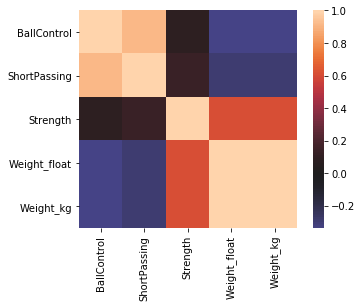

In [32]:
from seaborn import heatmap

heatmap(data[features].corr(method='pearson'), center=0, square=True)
plt.show()

In [33]:
features = ['BallControl', 'ShortPassing', 'Strength', 'Weight_kg']
X_train, X_test, y_train, y_test = train_test_split(data[features].values, data[target].values, train_size=0.8, random_state=2)

lr = Ridge(alpha=0)
lr.fit(X=X_train, y=y_train)

player['Predicted_dribbling_with_error'] = lr.predict(player[features].values)
player.head()

,BallControl,ShortPassing,Strength,Weight_float,Weight_kg,Dribbling,Predicted_dribbling,Predicted_dribbling_with_error
ID,,,,,,,,
158023,96.0,90.0,59.0,159.0,72.185,97.0,96.208007,96.208130
20801,94.0,81.0,79.0,183.0,83.083,88.0,90.567429,90.567307


### Part 2.3 Putting all together

**Task 5 (up to 5 points).** Build a Linear Regression model for _Value_ prediction for every football player and validate it. You **have to** use either your custom Linear Regression class or `sklearn.linear_model.Ridge` with regularization param alpha=0. Steps you need to follow:
- Extract float number from _Value_ field in DataFrame (**0.5 points**)
- Сhoose more features that you expect to influence on player _Value_ (at least 10)
- Plot feature correlation matrix. (**0.5 points**)
- Drop features that are highly correlated with each other (_abs_(corr) > 0.9) one by one until no correlated pairs left. _Hint_: you may reuse code from Task_9 in HW_1 for automatic correlated pairs selection. (**1.5 points**)
- Split data into train/test with some proportion (**0.5 points**)
- Train a model on train dataset, make predictions both for train and test. (**0.5 points**)
- Measure the model quality in terms of MSE in train and test samples,  (**0.5 points**)
- Write a short report about the work done. Why did you take these particular features? Can you find a logical explanation for high correlation of some of your features? Are you satisfied with the quality of predictions? etc. (**1 point**)

**Penalties**
- **-1 point** if used a different model besides custom Linear Regression or `sklearn.linear_model.Ridge` with regularization param alpha=0
- **-0.5 points** if number of selected features BEFORE removal of linearly dependent ones is less than 10.
- **-0.5 points** if did not remove linearly dependent features before training the model.

In [34]:
# Перечислим столбцы в датасете для удобного доступа к именам.
data.columns

Index(['Unnamed: 0', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle'

In [35]:
# Создаем изначальный список фич, исключая номер и "демонстрационные" фичи из упражнений.
features = list(data.columns[1:-2])

In [36]:
len(features)

90

In [37]:
# Создаем рабочий сабсет
fifa = data.loc[:, features]

In [38]:
fifa.head()

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Weight_float,Weight_kg,Height_meters
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,159.0,72.186,1.7018
20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,183.0,83.082,1.8796
190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M,150.0,68.100,1.7526
193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M,168.0,76.272,1.9304
192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M,154.0,69.916,1.8034


In [39]:
fifa.tail()

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Weight_float,Weight_kg,Height_meters
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,https://cdn.sofifa.org/teams/2/light/121.png,€60K,€1K,1307,Right,1.0,2.0,2.0,Medium/ Medium,Lean,No,CM,22.0,"May 3, 2017",NaN,2019,5'9,134lbs,42+2,42+2,42+2,44+2,44+2,44+2,44+2,44+2,45+2,45+2,45+2,44+2,45+2,45+2,45+2,44+2,44+2,45+2,45+2,45+2,44+2,45+2,45+2,45+2,45+2,45+2,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K,134.0,60.836,1.7526
243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,https://cdn.sofifa.org/teams/2/light/703.png,€60K,€1K,1098,Right,1.0,2.0,2.0,Medium/ Medium,Normal,No,ST,21.0,"Mar 19, 2018",NaN,2020,6'3,170lbs,45+2,45+2,45+2,39+2,42+2,42+2,42+2,39+2,40+2,40+2,40+2,38+2,35+2,35+2,35+2,38+2,30+2,31+2,31+2,31+2,30+2,29+2,32+2,32+2,32+2,29+2,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K,170.0,77.180,1.9050
241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,https://cdn.sofifa.org/teams/2/light/1944.png,€60K,€1K,1189,Right,1.0,3.0,2.0,Medium/ Medium,Normal,No,ST,33.0,"Jul 1, 2017",NaN,2021,5'8,148lbs,45+2,45+2,45+2,45+2,46+2,46+2,46+2,45+2,44+2,44+2,44+2,44+2,38+2,38+2,38+2,44+2,34+2,30+2,30+2,30+2,34+2,33+2,28+2,28+2,28+2,33+2,25.0,40.0,46.0,38.0,38.0,45.0,38.0,27.0,28.0,44.0,70.0,69.0,50.0,47.0,58.0,45.0,60.0,55.0,32.0,45.0,32.0,15.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K,148.0,67.192,1.7272
246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,https://cdn.sofifa.org/teams/2/light/15048.png,€60K,€1K,1228,Right,1.0,3.0,2.0,Medium/ Medium,Lean,No,RW,34.0,"Apr 24, 2018",NaN,2019,5'10,154lbs,47+2,47+2,47+2,47+2,46+2,46+2,46+2,47+2,45+2,45+2,45+2,46+2,39+2,39+2,39+2,46+2,36+2,32+2,32+2,32+2,36+2,35+2,31+2,31+2,31+2,35+2,44.0,50.0,39.0,42.0,40.0,51.0,34.0,32.0,32.0,52.0,61.0,60.0,52.0,21.0,71.0,64.0,42.0,40.0,48.0,34.0,33.0,22.0,44.0,47.0,50.0,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K,154.0,69.916,1.7780
246269,G. Nugent,16,https://cdn.sofifa.org/players/4/19/246269.png,England,https://cdn.sofifa.org/flags/14.png,46,66,Tranmere Rovers,https://cdn.sofifa.org/teams/2/light/15048.png,€60K,€1K,1321,Right,1.0,3.0,2.0,Medium/ Medium,Lean,No,CM,33.0,"Oct 30, 2018",NaN,2019,5'10,176lbs,43+2,43+2,43+2,45+2,44+2,44+2,44+2,45+2,45+2,45+2,45+2,46+2,45+2,45+2,45+2,46+2,46+2,46+2,46+2,46+2,46+2,46+2,47+2,47+2,47+2,46+2,41.0,34.0,46.0,48.0,30.0,43.0,40.0,34.0,44.0,51.0,57.0,55.0,55.0,51.0,63.0,43.0,62.0,47.0,60.0,32.0,56.0,42.0,34.0,49.0,33.0,43.0,40.0,43.0,50.0,10.0,15.0,9.0,12.0,9.0,€165K,176.0,79.904,1.7780


In [40]:
top = 10
print(tabulate(
    sorted(list(zip(fifa.columns, fifa.isnull().sum(), fifa.isnull().sum() / fifa.shape[0] * 100)), key=lambda x: -x[2])[:top], 
    headers=['col_name', 'null_cnt', 'null_perc']))

col_name       null_cnt    null_perc
-----------  ----------  -----------
Loaned From       16943      93.0576
LS                 2085      11.4516
ST                 2085      11.4516
RS                 2085      11.4516
LW                 2085      11.4516
LF                 2085      11.4516
CF                 2085      11.4516
RF                 2085      11.4516
RW                 2085      11.4516
LAM                2085      11.4516


In [41]:
# Мы увидели, что один из столбцов практически пустой. Дропнем его сразу.
fifa = fifa.drop('Loaned From', axis=1)

In [42]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 158023 to 246269
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      18207 non-null  object 
 1   Age                       18207 non-null  int64  
 2   Photo                     18207 non-null  object 
 3   Nationality               18207 non-null  object 
 4   Flag                      18207 non-null  object 
 5   Overall                   18207 non-null  int64  
 6   Potential                 18207 non-null  int64  
 7   Club                      17966 non-null  object 
 8   Club Logo                 18207 non-null  object 
 9   Value                     18207 non-null  object 
 10  Wage                      18207 non-null  object 
 11  Special                   18207 non-null  int64  
 12  Preferred Foot            18159 non-null  object 
 13  International Reputation  18159 non-null  float64
 14  

In [43]:
# Заполним пропуски еще одного столбца для избежания проблем с парсингом.
fifa['Release Clause'].ffill(inplace=True)

In [44]:
# Парсим набор фич, связанных со скиллованностью игрока на той или иной позиции на поле. 
# Берем Часть "до плюса", но не факт, что это верная интерпретация их значения.
for i in ['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']:
    fifa[i + '_parsed'] = fifa[i].str.extract(r'([0-9\.]+)[+-]').astype(float)

In [45]:
# Парсим "ценовые" поля. Примем систему в миллионах евро для избежания работы с огромными числами.
# Также не забываем, что данные состоят как из миллионных (M), так и тысячных(K) значений. Ноль тоже есть.
for i in ['Wage', 'Release Clause', 'Value']:
    fifa[i + '_float'] = fifa[i].str.extract(r'€([0-9\.]+)[MK]*').astype(float)
    fifa[i + '_float'] = fifa.apply(lambda row: row[i + '_float'] * 0.001 if row[i][-1] == 'K' 
                                 else row[i + '_float'], axis=1)

In [46]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 158023 to 246269
Columns: 118 entries, Name to Value_float
dtypes: float64(70), int64(4), object(44)
memory usage: 17.2+ MB


In [47]:
# Посмотрим, что получилось. Кажется, все распарсилось верно.
fifa.head()

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Weight_float,Weight_kg,Height_meters,LS_parsed,ST_parsed,RS_parsed,LW_parsed,LF_parsed,CF_parsed,RF_parsed,RW_parsed,LAM_parsed,CAM_parsed,RAM_parsed,LM_parsed,LCM_parsed,CM_parsed,RCM_parsed,RM_parsed,LWB_parsed,LDM_parsed,CDM_parsed,RDM_parsed,RWB_parsed,LB_parsed,LCB_parsed,CB_parsed,RCB_parsed,RB_parsed,Wage_float,Release Clause_float,Value_float
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,159.0,72.186,1.7018,88.0,88.0,88.0,92.0,93.0,93.0,93.0,92.0,93.0,93.0,93.0,91.0,84.0,84.0,84.0,91.0,64.0,61.0,61.0,61.0,64.0,59.0,47.0,47.0,47.0,59.0,0.565,226.5,110.5
20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,183.0,83.082,1.8796,91.0,91.0,91.0,89.0,90.0,90.0,90.0,89.0,88.0,88.0,88.0,88.0,81.0,81.0,81.0,88.0,65.0,61.0,61.0,61.0,65.0,61.0,53.0,53.0,53.0,61.0,0.405,127.1,77.0
190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M,150.0,68.100,1.7526,84.0,84.0,84.0,89.0,89.0,89.0,89.0,89.0,89.0,89.0,89.0,88.0,81.0,81.0,81.0,88.0,65.0,60.0,60.0,60.0,65.0,60.0,47.0,47.0,47.0,60.0,0.290,228.1,118.5
193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M,168.0,76.272,1.9304

In [48]:
fifa.tail()

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Weight_float,Weight_kg,Height_meters,LS_parsed,ST_parsed,RS_parsed,LW_parsed,LF_parsed,CF_parsed,RF_parsed,RW_parsed,LAM_parsed,CAM_parsed,RAM_parsed,LM_parsed,LCM_parsed,CM_parsed,RCM_parsed,RM_parsed,LWB_parsed,LDM_parsed,CDM_parsed,RDM_parsed,RWB_parsed,LB_parsed,LCB_parsed,CB_parsed,RCB_parsed,RB_parsed,Wage_float,Release Clause_float,Value_float
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,https://cdn.sofifa.org/teams/2/light/121.png,€60K,€1K,1307,Right,1.0,2.0,2.0,Medium/ Medium,Lean,No,CM,22.0,"May 3, 2017",2019,5'9,134lbs,42+2,42+2,42+2,44+2,44+2,44+2,44+2,44+2,45+2,45+2,45+2,44+2,45+2,45+2,45+2,44+2,44+2,45+2,45+2,45+2,44+2,45+2,45+2,45+2,45+2,45+2,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K,134.0,60.836,1.7526,42.0,42.0,42.0,44.0,44.0,44.0,44.0,44.0,45.0,45.0,45.0,44.0,45.0,45.0,45.0,44.0,44.0,45.0,45.0,45.0,44.0,45.0,45.0,45.0,45.0,45.0,0.001,0.143,0.06
243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,https://cdn.sofifa.org/teams/2/light/703.png,€60K,€1K,1098,Right,1.0,2.0,2.0,Medium/ Medium,Normal,No,ST,21.0,"Mar 19, 2018",2020,6'3,170lbs,45+2,45+2,45+2,39+2,42+2,42+2,42+2,39+2,40+2,40+2,40+2,38+2,35+2,35+2,35+2,38+2,30+2,31+2,31+2,31+2,30+2,29+2,32+2,32+2,32+2,29+2,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K,170.0,77.180,1.9050,45.0,45.0,45.0,39.0,42.0,42.0,42.0,39.0,40.0,40.0,40.0,38.0,35.0,35.0,35.0,38.0,30.0,31.0,31.0,31.0,30.0,29.0,32.0,32.0,32.0,29.0,0.001,0.113,0.06
241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,https://cdn.sofifa.org/teams/2/light/1944.png,€60K,€1K,1189,Right,1.0,3.0,2.0,Medium/ Medium,Normal,No,ST,33.0,"Jul 1, 2017",2021,5'8,148lbs,45+2,45+2,45+2,45+2,46+2,46+2,46+2,45+2,44+2,44+2,44+2,44+2,38+2,38+2,38+2,44+2,34+2,30+2,30+2,30+2,34+2,33+2,28+2,28+2,28+2,33+2,25.0,40.0,46.0,38.0,38.0,45.0,38.0,27.0,28.0,44.0,70.0,69.0,50.0,47.0,58.0,45.0,60.0,55.0,32.0,45.0,32.0,15.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K,148.0,67.192,1.7272,45.0,45.0,45.0,45.0,46.0,46.0,46.0,45.0,44.0,44.0,44.0,44.0,38.0,38.0,38.0,44.0,34.0,30.0,30.0,30.0,34.0,33.0,28.0,28.0,28.0,33.0,0.001,0.165,0.06
246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,https://cdn.sofifa.org/teams/2/light/15048.png,€60K,€1K,1228,Right,1.0,3.0,2.0,Medium/ Medium,Lean,No,RW,34.0,"Apr 24, 2018",2019,5'10,154lbs,47+2,47+2,47+2,47+2,46+2,46+2,46+2,47+2,45+2,45+2,45+2,46+2,39+2,39+2,39+2,46+2,36+2,32+2,32+2,32+2,36+2,35+2,31+2,31+2,31+2,35+2,44.0,50.0,39.0,42.0,40.0,51.0,34.0,32.0,32.0,52.0,61.0,60.0,52.0,21.0,71.0,64.0,42.0,40.0,48.0,34.0,33.0,22.0,44.0,47.0,50.0,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€14

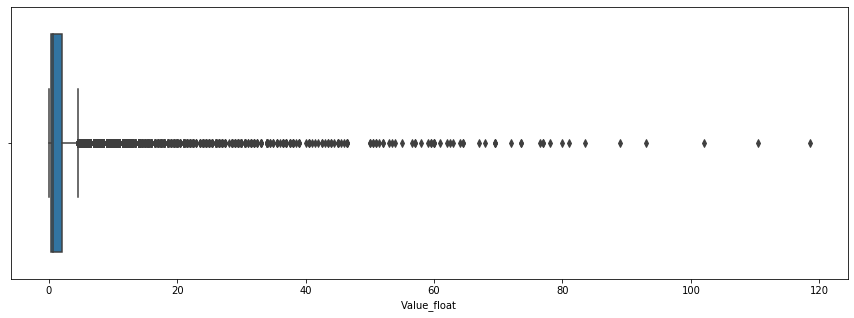

In [49]:
# Посмотрим на статистику нашего таргета.
plt.figure(figsize=(15,5))
sns.boxplot(fifa['Value_float']);

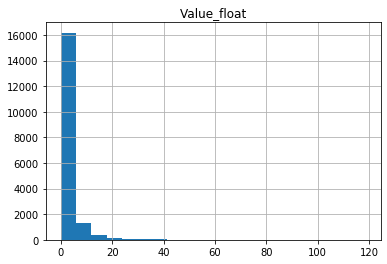

In [50]:
fifa.hist('Value_float', bins=20);

In [51]:
summary = fifa['Value_float'].describe()
summary.loc['95%'] = fifa['Value_float'].quantile(0.95)
summary.loc['var'] = fifa['Value_float'].var()
summary

count    18207.000000
mean         2.410696
std          5.594933
min          0.000000
25%          0.300000
50%          0.675000
75%          2.000000
max        118.500000
95%         10.000000
var         31.303272
Name: Value_float, dtype: float64

Видим, что статистика у таргета довольно своеобразная. Доверительный интервал (95% данных) сосредоточен в пределах значений до 10.0, в то время как максимальное значение целых 118.5.  
Standart Deviation превышает среднее значение более, чем в 2 раза. Видим довольно большое количество точек, которые можно считать выбросами (без обид, Leo), их значения отличаются от таковых в доверительном интервале на порядок и более.  
Такое поведение таргета может создать проблемы при обучении модели. Посмотрим на это дальше, пока не будем ничего выбрасывать.

In [52]:
# Обновим список фич, выбросив из него категориальные столбцы и таргет. 
features = list(fifa.select_dtypes(exclude='object').drop('Value_float', axis=1).columns)

In [53]:
len(features)

73

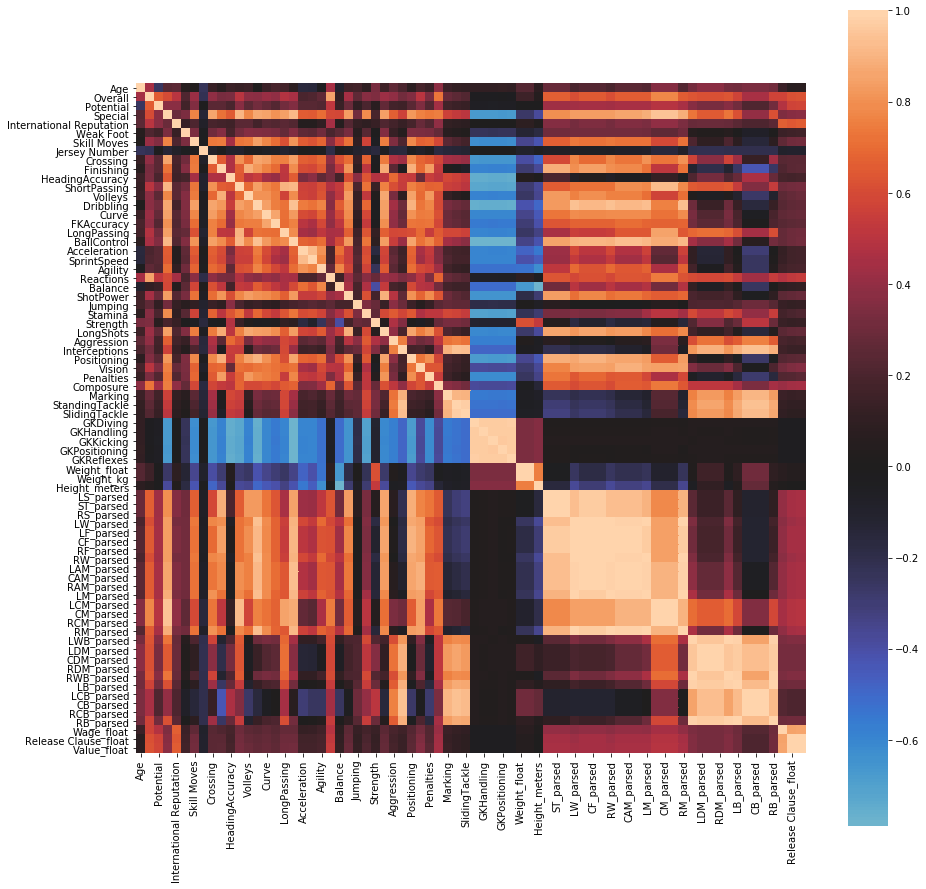

In [54]:
# Построим исходный heatmap для всех имеющихся со старта фич и таргета.
plt.figure(figsize=(15,15))
sns.heatmap(fifa[features + ['Value_float']].corr(), square=True, center=0);

Конечно, при таком колчестве фич по этому heatmap'у мало что видно. Тем не менее, уже очевидно, что есть целые блоки параметров, линейно коррелирующих между собой, равно как и блоки, не имеющие практически никакой корреляции с таргетом. Поработаем с этим.

Сперва оставим в списке только фичи, имеющие корреляцию с таргетом не менее 0.3.

In [55]:
corr_targ = fifa[features + ['Value_float']].corr().abs().unstack()

In [56]:
corr_targ = corr_targ[corr_targ.index.get_level_values(0) == 'Value_float']

In [57]:
corr_targ[corr_targ >= 0.3].index.get_level_values(1)

Index(['Overall', 'Potential', 'Special', 'International Reputation',
       'Skill Moves', 'ShortPassing', 'LongPassing', 'BallControl',
       'Reactions', 'Vision', 'Composure', 'LS_parsed', 'ST_parsed',
       'RS_parsed', 'LW_parsed', 'LF_parsed', 'CF_parsed', 'RF_parsed',
       'RW_parsed', 'LAM_parsed', 'CAM_parsed', 'RAM_parsed', 'LM_parsed',
       'LCM_parsed', 'CM_parsed', 'RCM_parsed', 'RM_parsed', 'LWB_parsed',
       'LDM_parsed', 'CDM_parsed', 'RDM_parsed', 'RWB_parsed', 'LB_parsed',
       'RB_parsed', 'Wage_float', 'Release Clause_float', 'Value_float'],
      dtype='object')

In [58]:
features = corr_targ[corr_targ >= 0.3].index.get_level_values(1).tolist()

In [59]:
features.remove('Value_float')

In [60]:
# Заполним пропуски в данных медианными значениями.
for f in features:
    fifa.fillna({f:fifa[f].median()}, inplace=True)

In [61]:
fifa[features].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 158023 to 246269
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Overall                   18207 non-null  int64  
 1   Potential                 18207 non-null  int64  
 2   Special                   18207 non-null  int64  
 3   International Reputation  18207 non-null  float64
 4   Skill Moves               18207 non-null  float64
 5   ShortPassing              18207 non-null  float64
 6   LongPassing               18207 non-null  float64
 7   BallControl               18207 non-null  float64
 8   Reactions                 18207 non-null  float64
 9   Vision                    18207 non-null  float64
 10  Composure                 18207 non-null  float64
 11  LS_parsed                 18207 non-null  float64
 12  ST_parsed                 18207 non-null  float64
 13  RS_parsed                 18207 non-null  float64
 14  

In [62]:
# Теперь сделаем так, чтобы у нас не осталось фич, линейно коррелирующих между собой. Сперва посмотрим на них.
c = fifa[features].corr().abs().unstack()

c[c.index.get_level_values(0) != c.index.get_level_values(1)]\
.sort_values(ascending=False).head(10)

RAM_parsed  CAM_parsed    1.0
CF_parsed   LF_parsed     1.0
RF_parsed   CF_parsed     1.0
            LF_parsed     1.0
RM_parsed   LM_parsed     1.0
CAM_parsed  LAM_parsed    1.0
            RAM_parsed    1.0
RDM_parsed  LDM_parsed    1.0
LCM_parsed  RCM_parsed    1.0
ST_parsed   RS_parsed     1.0
dtype: float64

In [63]:
# Выбросим из списка фич по одной те, что имеют корреляцию с какой-то еще более 0.9. 
# Заодно внесем эти пары в список для просмотра.
linearly_correlated = []

while c[c.index.get_level_values(0) != c.index.get_level_values(1)].sort_values(ascending=False).head(1).values > 0.9:
    del_ = c[c.index.get_level_values(0) != c.index.get_level_values(1)]\
    .sort_values(ascending=False).head(1).index
    features.remove(del_.get_level_values(0)[0])
    linearly_correlated.append(del_[0])
    c = fifa[features].corr().abs().unstack()

In [64]:
for pair in linearly_correlated:
    print(pair)

('RAM_parsed', 'CAM_parsed')
('RF_parsed', 'CF_parsed')
('RS_parsed', 'ST_parsed')
('LCM_parsed', 'RCM_parsed')
('RWB_parsed', 'LWB_parsed')
('CF_parsed', 'LF_parsed')
('LDM_parsed', 'CDM_parsed')
('RB_parsed', 'LB_parsed')
('RCM_parsed', 'CM_parsed')
('CDM_parsed', 'RDM_parsed')
('ST_parsed', 'LS_parsed')
('CAM_parsed', 'LAM_parsed')
('LM_parsed', 'RM_parsed')
('RW_parsed', 'LW_parsed')
('RM_parsed', 'LW_parsed')
('LF_parsed', 'LAM_parsed')
('LAM_parsed', 'LW_parsed')
('LWB_parsed', 'LB_parsed')
('RDM_parsed', 'LB_parsed')
('LW_parsed', 'LS_parsed')
('Special', 'BallControl')
('BallControl', 'ShortPassing')


Видим, что в блоке фич, обозначающих скилл игрока на той или иной позиции на поле, корреляция фич между собой не просто высокая - многие столбцы абсолютно равны между собой. Это, по сути означает, что 100% игроков одинаково хорошио себя чувствуют на определенных сочетаниях позиций. Если эти позиции разобрать, окажется, что коррелируют с коэффициентом 1 между собой позиции на поле, находящиеся на одной линии - форварды, полузащитники и т.д. Хоть это и не совсем отвечает реальности, но идея объяснима - игрок будет одинаково хорош как на левом фланге защиты, так и на правом, и т.д.  
Кроме "позиционного" блока линейно зависимыми между собой оказались 'BallControl' и 'ShortPassing', что объяснимо, ведь высокое качество пасов помогает удерживать мяч. При этом, 'LongPassing' такой корреляции с контролем мяча не имеют - видимо, потому, что после длинных пасов мяч значительно реже возвращается обратно к игроку, нежели после коротких.  
Кроме того, в список попала пара 'Special' и 'BallControl'. Столбец 'Special' после некоторого гугления и сравнения с сайтом https://sofifa.com/ на поверку предположительно оказался параметром Total Score. В общем, тоже логично, что владение мячом напрямую зависит от совокупности всех скиллов.  
В любом случае, мы избавились от тех, что имеют слишком высокую корреляцию между собой.

In [65]:
c[c.index.get_level_values(0) != c.index.get_level_values(1)]\
.sort_values(ascending=False)[::2]

ShortPassing              LongPassing                 0.895668
Overall                   Reactions                   0.849592
Release Clause_float      Wage_float                  0.847198
LS_parsed                 CM_parsed                   0.777521
Skill Moves               ShortPassing                0.730144
                                                        ...   
International Reputation  LB_parsed                   0.236695
Skill Moves               International Reputation    0.208429
Vision                    LB_parsed                   0.163053
LS_parsed                 LB_parsed                   0.095296
LB_parsed                 Skill Moves                 0.035121
Length: 91, dtype: float64

In [66]:
len(features)

14

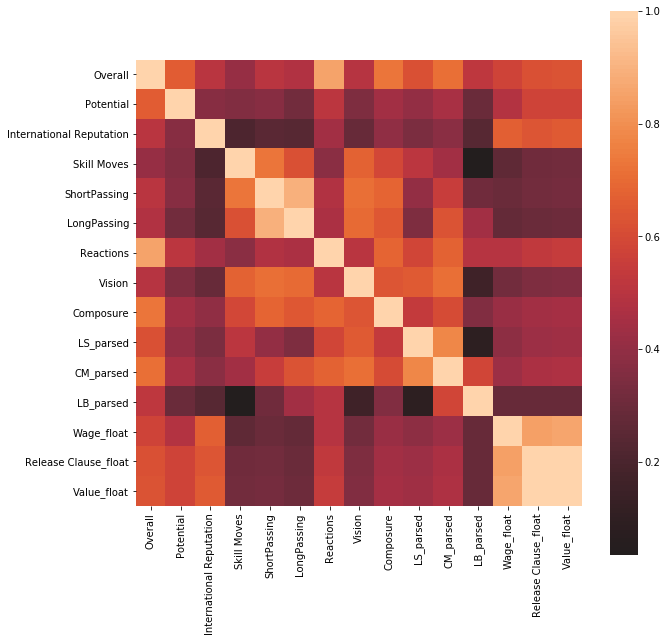

In [67]:
plt.figure(figsize=(10,10))
sns.heatmap(fifa[features + ['Value_float']].corr(), square=True, center=0);

Интересно, что в списке остались 3 фичи из "позиционного" блока. Между собой они не члишком сильно коррелируют - оставим их.  
В целом, heatmap уже достаточно нагляден. В частности, мы видим 2 "ценовых" параметра - 'Wage_float' и 'Release Clause_float', означающие "зарплату" игрока и сумму, которую другой клуб должен выплатить нынешнему клубу игрока за его право перехода до истечения контракта. Обе эти фичи имеют очень высокую корреляцию с таргетом. Однако и то, и другое явно является не причиной, а следствием стоимости игрока (не "игрок ценен, потому что у него высокая зарплата", а наоборот). Поэтому избавимся от них на основании логики и здравого смысла, хотя, чисто математически, это почти идеальные предсказатели.

In [68]:
features.remove('Release Clause_float')
features.remove('Wage_float')
target = 'Value_float'
print(f'Total features chosen: {len(features)}')

Total features chosen: 12


Наконец, разбиваем наш датасет с выбранными фичами на тренировочную и тестовую выборки; тренируем модель; делаем предсказания на тестовом сете и оцениваем качество модели.

In [69]:
X_train, X_test, y_train, y_test = train_test_split(fifa[features].values, fifa[target].values, train_size=0.8, random_state=13)

In [70]:
lr_model = LinearRegression(fit_intercept=True)

In [71]:
lr_model.fit(X=X_train, y=y_train)

LinearRegression(fit_intercept=True)

In [72]:
y_pred_train = lr_model.predict(X_train)
y_pred_test = lr_model.predict(X_test)

In [73]:
from sklearn.metrics import r2_score

In [74]:
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
print(f'Train MSE {mse_train}, test MSE {mse_test}')

Train MSE 13.195860935130314, test MSE 11.705990818641261


In [75]:
r2_test = r2_score(y_test, y_pred_test)
print(f'Test R2 is {r2_test}')

Test R2 is 0.5764993942192436


In [76]:
print(f'Intercept is: \n{lr_model.intercept_}, \nweights are: \n{lr_model.coef_}')

Intercept is: 
-34.015292813204475, 
weights are: 
[ 1.64981561e-01  2.26330530e-01  6.27054868e+00  5.19249764e-01
  2.49854157e-03 -1.43557056e-02  2.45406136e-02 -2.95211508e-03
 -2.43918089e-02  8.99080751e-03  3.15039893e-02 -8.93279032e-03]


In [77]:
for z in zip(features, lr_model.coef_):
    print(z)

('Overall', 0.16498156067103859)
('Potential', 0.22633053026420968)
('International Reputation', 6.270548680718211)
('Skill Moves', 0.519249763684429)
('ShortPassing', 0.002498541569191389)
('LongPassing', -0.014355705567650277)
('Reactions', 0.024540613608310426)
('Vision', -0.002952115079390643)
('Composure', -0.024391808937302917)
('LS_parsed', 0.008990807509700945)
('CM_parsed', 0.03150398928373116)
('LB_parsed', -0.008932790322803918)


Модель, в целом, несмотря на необычную статистику таргета, показала сравнительно неплохой результат:  
- MSE на тестовом сете 11.7 при дисперсии таргета 31.3 (37%);
- Результат на тестовом сете не имеет огромных расхождений с таковым на тренировочном, что говорит о сносной масштабируемости модели;
- Значения весов не показывают сильного оверфиттинга (правда, коэффициент фичи 'International Reputation' все же выбивается из общего ряда, но не на несколько порядков, как в примере с лекции).

Можно попробовать проверить еще две модели и сравнить их результаты с текущей:  
- модель без intercept;
- модель на датасете с исключенными выбросами (вспоминая особенности статистики).

In [78]:
lr_model_nointer = LinearRegression(fit_intercept=False)

In [79]:
lr_model_nointer.fit(X=X_train, y=y_train)

LinearRegression(fit_intercept=False)

In [80]:
y_pred_train_nointer = lr_model_nointer.predict(X_train)
y_pred_test_nointer = lr_model_nointer.predict(X_test)

In [81]:
mse_train_nointer = mean_squared_error(y_train, y_pred_train_nointer)
mse_test_nointer = mean_squared_error(y_test, y_pred_test_nointer)
print(f'Train MSE {mse_train_nointer}, test MSE {mse_test_nointer}')

Train MSE 19.785267859512793, test MSE 17.831106652355153


In [82]:
r2_test_nointer = r2_score(y_test, y_pred_test_nointer)
print(f'Test R2 is {r2_test_nointer}')

Test R2 is 0.3549042890937274


Результаты модели без интерсепта значительно хуже, оставим ее в покое.

Поработаем с моделью, используя датасет с выброшенными аутлаерами.

In [83]:
wo_out = fifa[fifa['Value_float'] <= fifa['Value_float'].quantile(0.95)]

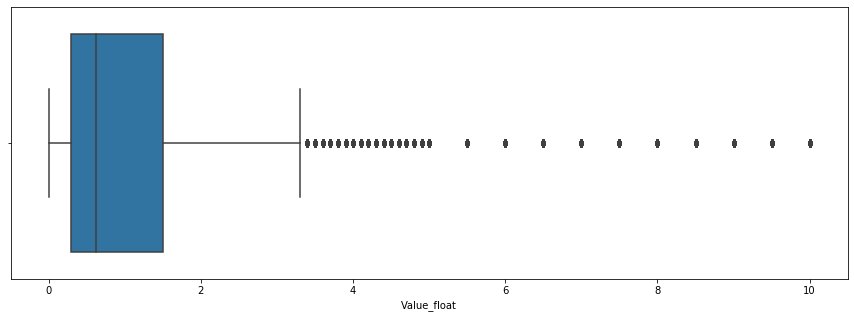

In [84]:
plt.figure(figsize=(15,5))
sns.boxplot(wo_out['Value_float']);

In [85]:
summary_wo_out = wo_out['Value_float'].describe()
summary_wo_out.loc['95%'] = wo_out['Value_float'].quantile(0.95)
summary_wo_out.loc['var'] = wo_out['Value_float'].var()
summary_wo_out

count    17328.000000
mean         1.468406
std          2.043068
min          0.000000
25%          0.290000
50%          0.625000
75%          1.500000
max         10.000000
95%          6.500000
var          4.174127
Name: Value_float, dtype: float64

In [86]:
X_train_wo_out, X_test_wo_out, y_train_wo_out, y_test_wo_out = train_test_split(wo_out[features].values, wo_out[target].values, train_size=0.8, random_state=13)

In [87]:
lr_model_wo_out = LinearRegression(fit_intercept=True)

In [88]:
lr_model_wo_out.fit(X=X_train_wo_out, y=y_train_wo_out)

LinearRegression(fit_intercept=True)

In [89]:
y_pred_train_wo_out = lr_model_wo_out.predict(X_train_wo_out)
y_pred_test_wo_out = lr_model_wo_out.predict(X_test_wo_out)

In [90]:
mse_train_wo_out = mean_squared_error(y_train_wo_out, y_pred_train_wo_out)
mse_test_wo_out = mean_squared_error(y_test_wo_out, y_pred_test_wo_out)
print(f'Train MSE {mse_train_wo_out}, test MSE {mse_test_wo_out}')

Train MSE 1.65544299171587, test MSE 1.6693381828936984


In [91]:
r2_test_wo_out = r2_score(y_test_wo_out, y_pred_test_wo_out)
print(f'Test R2 is {r2_test_wo_out}')

Test R2 is 0.5992403863727087


In [92]:
print(f'Intercept is: \n{lr_model_wo_out.intercept_}, \nweights are: \n{lr_model_wo_out.coef_}')

Intercept is: 
-18.157689468234455, 
weights are: 
[ 1.39066380e-01  1.01340735e-01  1.04562105e+00  2.56096169e-01
 -9.10272011e-04 -2.53397816e-03  8.40928342e-03 -2.04888561e-03
 -5.09904463e-03  2.06371890e-02  2.41002387e-03  7.15412320e-03]


In [93]:
for z in zip(features, lr_model_wo_out.coef_):
    print(z)

('Overall', 0.13906638005056168)
('Potential', 0.10134073460338866)
('International Reputation', 1.045621047035856)
('Skill Moves', 0.25609616891670806)
('ShortPassing', -0.0009102720112407507)
('LongPassing', -0.0025339781634244113)
('Reactions', 0.008409283423657996)
('Vision', -0.002048885606031279)
('Composure', -0.005099044634591193)
('LS_parsed', 0.020637189009168885)
('CM_parsed', 0.002410023872059984)
('LB_parsed', 0.0071541231971206445)


Модель с выброшенными аутлаерами ("вторая") также показала неплохой результат:  
- MSE на тестовом сете 1.67 при дисперсии таргета 4.2 (38%);
- Результат на тестовом сете близок с таковым на тренировочном, что говорит о сносной масштабируемости модели;
- R2 даже незначительно выше, чем у основной модели;
- Значения весов не показывают сильного оверфиттинга (и коэффициент фичи 'International Reputation' существенно снизился).

Посмотрим на не очень информативное, но все же представление реальных и предсказанных значений на тестовой выборке для обеих моделей.  
Оно не показывает величину ошибок конкретно по точкам, но отражает адекватное скопление предсказанных точек на наиболее плотном скоплении реальных.

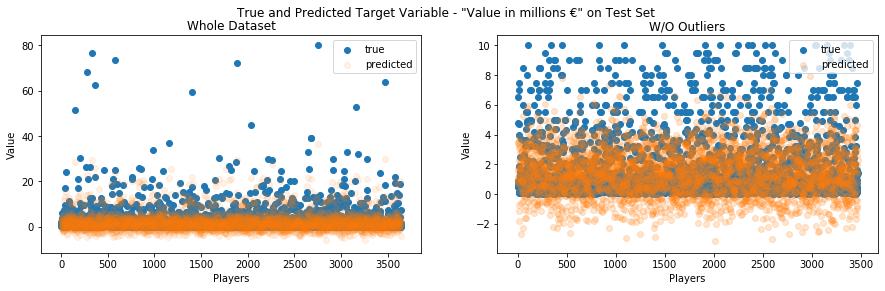

In [94]:
figure, axes = plt.subplots(1, 2, figsize=(15,4))
figure.suptitle(f'True and Predicted Target Variable - "Value in millions €" on Test Set')

axes[0].scatter(range(y_test.shape[0]), y_test, label='true')
axes[0].scatter(range(y_pred_test.shape[0]), y_pred_test, alpha=0.1, label='predicted')
axes[0].set_title('Whole Dataset')
axes[1].scatter(range(y_test_wo_out.shape[0]), y_test_wo_out, label='true')
axes[1].scatter(range(y_pred_test_wo_out.shape[0]), y_pred_test_wo_out, alpha=0.2, label='predicted')
axes[1].set_title('W/O Outliers')

for a in axes:
    a.set(xlabel='Players', ylabel='Value')
    a.legend()

plt.subplots_adjust(wspace=0.2);

Попробуем проверить предсказания обеих моделей на общем датасете с добавленным случайным небольшим шумом для каждой фичи и сравнить их результаты. По идее, это, как и тестовая выборка, - данные, которая модель "не видела".

In [95]:
players = fifa.loc[:, features + [target]]

In [96]:
players[features] = players[features] * np.random.uniform(low=0.995, high=1.005, size=(len(players), len(features)))

In [97]:
players['val_pred'] = lr_model.predict(players[features])
players['val_pred_wo_out'] = lr_model_wo_out.predict(players[features])

In [98]:
players

,Overall,Potential,International Reputation,Skill Moves,ShortPassing,LongPassing,Reactions,Vision,Composure,LS_parsed,CM_parsed,LB_parsed,Value_float,val_pred,val_pred_wo_out
ID,,,,,,,,,,,,,,,
158023,94.143397,94.354161,5.003320,4.005640,89.903356,87.197625,95.007093,93.977513,96.341712,88.257835,83.839558,59.129490,110.50,37.908941,13.012635
20801,94.087711,94.258322,5.002168,5.009696,80.607663,77.170363,95.880760,82.267020,94.860683,91.325016,81.402506,61.098315,77.00,38.538265,13.395381
190871,91.901205,92.810440,4.981932,5.013832,84.191038,78.035022,94.107259,87.280098,94.318549,84.169389,81.377820,59.913123,118.50,37.622005,12.740398
193080,90.843031,92.960608,4.010914,1.002062,50.095034,50.928651,90.414677,67.992245,67.991530,57.771772,58.728168,57.727274,72.00,29.290551,10.193180
192985,90.883972,92.049178,3.988648,4.002777,92.203407,90.576060,90.983065,94.109125,87.632291,81.902401,86.781573,73.050721,102.00,30.467205,11.239246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238813,47.183914,64.934069,0.997343,1.994474,49.233987,44.982326,48.985900,52.053642,44.801598,41.863402,45.175522,44.919658,0.06,-3.413458,-2.249691
243165,47.167243,62.737938,0.998949,2.007230,43.197069,24.966798,40.008356,32.837389,41.955875,44.931491,34.923004,29.017730,0.06,-3.871843,-2.510175
241638,47.040070,66.735805,0.997586,1.999591,38.183367,28.056948,46.815247,43.198641,40.970339,44.808961,37.837368,32.882078,0.06,-2.840697,-2.056183


In [99]:
noisy_mse = mean_squared_error(players['val_pred'], players['Value_float'])
noisy_mse_wo_out = mean_squared_error(players['val_pred_wo_out'], players['Value_float'])
print(f'MSE of models on "noisy" data are: \n{noisy_mse} for model WITH outliers (was {mse_test} on test set), \
      \n{noisy_mse_wo_out} for model WITHOUT outliers (was {mse_test_wo_out} on test set)')

MSE of models on "noisy" data are: 
12.90095414419931 for model WITH outliers (was 11.705990818641261 on test set),       
19.95626253640174 for model WITHOUT outliers (was 1.6693381828936984 on test set)


In [100]:
noisy_r2 = r2_score(players['Value_float'], players['val_pred'])
noisy_r2_wo_out = r2_score(players['Value_float'], players['val_pred_wo_out'])
print(f'R2 of models on "noisy" data are: \n{noisy_r2} for model WITH outliers (was {r2_test} on test set), \
      \n{noisy_r2_wo_out} for model WITHOUT outliers (was {r2_test_wo_out} on test set)')

R2 of models on "noisy" data are: 
0.587849381240823 for model WITH outliers (was 0.5764993942192436 on test set),       
0.3624513458024512 for model WITHOUT outliers (was 0.5992403863727087 on test set)


Мы видим, что точность основной модели снизилась несильно, а вот "второй" модели, тренированной на выборке, не содержащей выбросов, - упала очень серьезно как в части MSE (на порядок), так и R2 (в полтора раза).  
По этому поводу можно сказать следующее. Точность "второй" модели ожидаемо упала при использовании ее на датасете с очень большими значениями таргета, которые она не видела при тренировке (хоть таких значений и немного, но их вклад в ошибку, видимо, огромен). Соответственно, "вторая" модель будет, предположительно, лучше предсказывать "недорогих" игроков и, в общем, сухо и цинично оценивать супердорогих звезд согласно их "ТТХ".  
Ведь, действительно, скиллы таких звезд, как Роналдо и Месси не превышают таковые средних игроков в десятки раз (как стоимость). Видимо, их стоимость формируют другие параметры, в датасете отсутствующие (или не раскодированные). Их отголоском является параметр 'International Reputation'.

В целом по результатам можно сказать следующее.  
По численным метрикам обе модели показали неплохую точность на тестовых выборках. Однако первая в предсказаниях будет в целом завышать стоимость недорогих и средних игроков под влиянием топовых выбросов (снова да простят нас иконы футбола), в то время как вторая предскажет их точнее, но "не разглядит" очередную звезду. Впрочем, первая модель на "топах" тоже ошибается очень и очень серьезно, хоть и меньше. У обеих моделей также не самый высокий R2.  
Также следует упомянуть наличие у обеих моделей предсказаний стоимости с отрицательным знаком. Их, наверное, следует приравнять к нулю.  
С практической точки зрения модели малополезны, т.к., несмотря на сносные численные показатели качества, их ошибки составляют до десятков миллионов евро. Для улучшения предсказаний, видимо, нужна нелинейная модель.